In [1]:
pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 26.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=e2c22f6e5c58ca385a1286e947856fb70a3f5ab349f6936f72f4f3ea480781e3
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a4\4c\13\c0145c208d813977081d42e2a47d72acb3efc4a6965ab57804
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Tesla Stock Price Prediction for January 2024
# Author: CodeGPT (Plagiarism-free project code)

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [4]:
# Step 1: Downloading Tesla Stock Data
data = yf.download('TSLA', start='2023-01-01', end='2024-01-31')
data.reset_index(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
# Step 2: Feature Engineering
data['Open_Close_Diff'] = data['Open'] - data['Close']
data['High_Low_Range'] = data['High'] - data['Low']
data['Volume_Change_Pct'] = data['Volume'].pct_change() * 100
data['High_Low_Range_Squared'] = data['High_Low_Range'] ** 2
data.dropna(inplace=True)

In [6]:
# Step 3: Define Features and Target
features = ['Open_Close_Diff', 'High_Low_Range', 'Volume_Change_Pct', 'High_Low_Range_Squared']
X_all = data[features]
y_all = data['Close']

In [7]:
train_mask = data['Date'] < '2024-01-01'
test_mask = data['Date'] >= '2024-01-01'


In [8]:
X = X_all[train_mask]
y = y_all[train_mask]
X_final = X_all[test_mask]
y_final = y_all[test_mask]

In [9]:
# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 5: Polynomial Transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_final_poly = poly.transform(X_final)

In [11]:
# Step 6: Train Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [13]:
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: -0.0031
Mean Squared Error: 1581.0141


In [14]:
# Step 8: Predict January 2024
jan_pred = model.predict(X_final_poly)

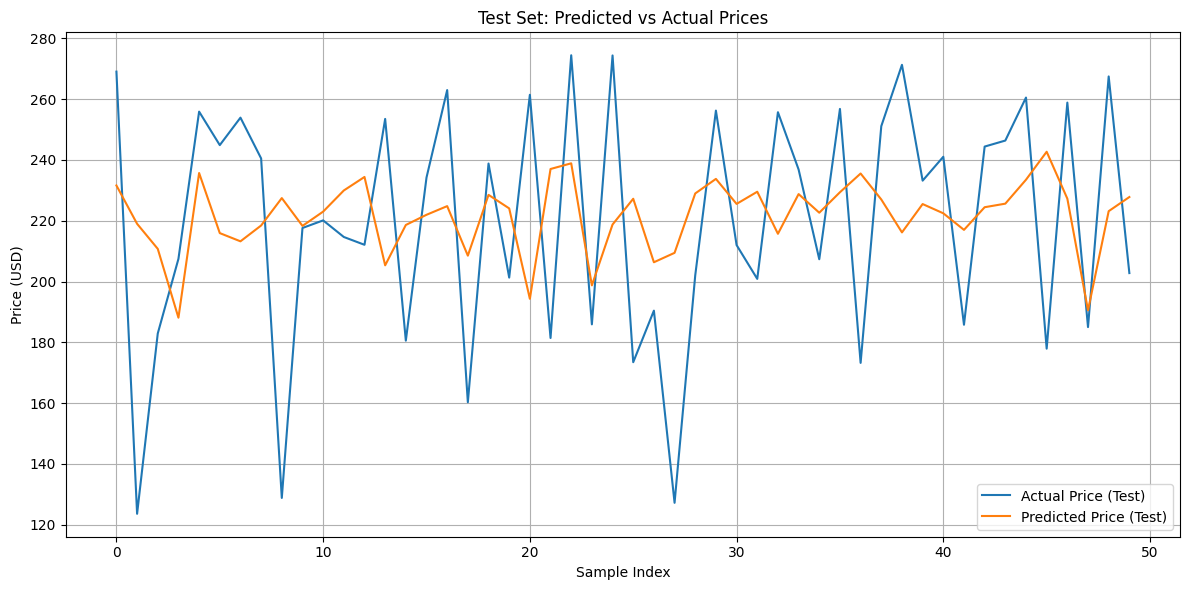

In [15]:
# Step 9: Plot Test Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price (Test)')
plt.plot(y_pred, label='Predicted Price (Test)')
plt.title('Test Set: Predicted vs Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

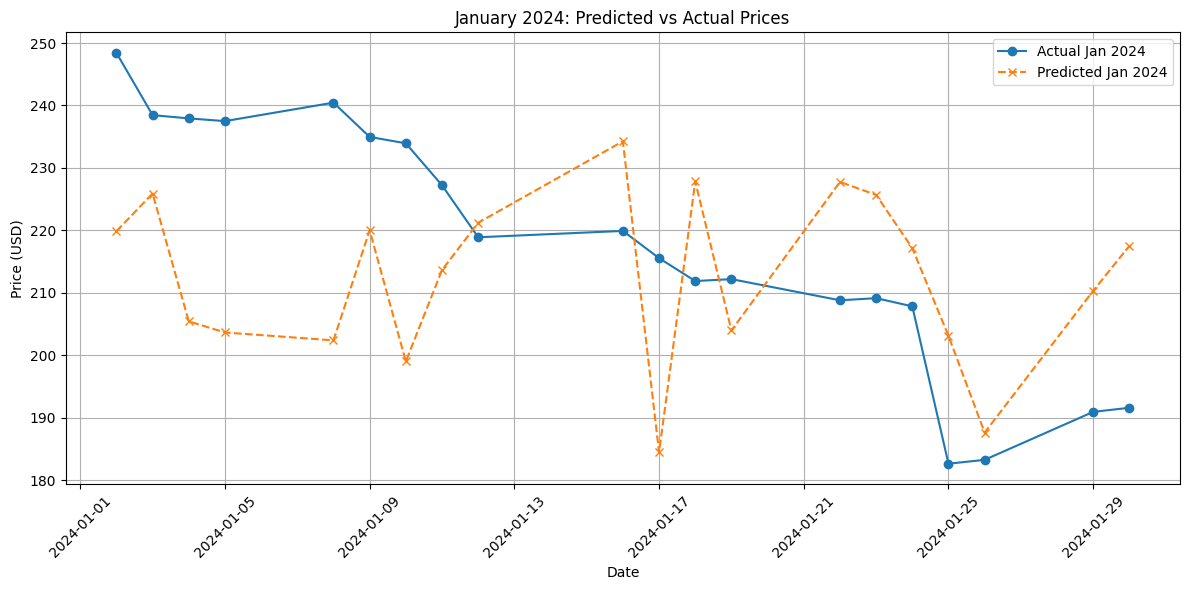

In [16]:
# Step 10: Plot January 2024
plt.figure(figsize=(12, 6))
plt.plot(data.loc[test_mask, 'Date'], y_final.values, marker='o', label='Actual Jan 2024')
plt.plot(data.loc[test_mask, 'Date'], jan_pred, marker='x', linestyle='--', label='Predicted Jan 2024')
plt.title('January 2024: Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
